# Classification and clustering

## Predicting the credit Score

The two csv files (origin: [kaggle](https://www.kaggle.com/datasets/clkmuhammed/creditscoreclassification?select=train.csv)) contain the training set (resp the validation set) about the clients from a "global finance company".

Your goal is to use all available information to build a model to accurately predict the probability of default which is coded up as a qualitative variable with three values.

Update: the `test.csv` file now contains the score that should be predicted.

__Import training set and validation sets__

We follow a three sets approach and define the following sets:
- data used for the developing the model (`dataset` from `train.csv`) will be split into:
    - training dataset (variable called `train`)
    - test data set (variable called tes
- data use
    

In [78]:
import pandas
dataset = pandas.read_csv("train.csv")
validation = pandas.read_csv("test.csv")

__Describe the dataset.__

Here is a list of columns

In [79]:
dataset.columns

Index(['Unnamed: 0', 'ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN',
       'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

__How is the credit category encoded? Create a new variable representing it with values 0,1,2.__

The credit score can be found in column `Credit_Score`. It takes three values.

In [80]:
dataset['Credit_Score'].unique()

array(['Standard', 'Poor', 'Good'], dtype=object)

In [128]:
# we can use the LabelEncoder function from sklearn
from sklearn.preprocessing import LabelEncoder
cle = LabelEncoder()
dataset['Credit_Score'] = cle.fit_transform(dataset['Credit_Score'])

In [ ]:

# check which value corresponds to what
# this is needed to interpret 0,1,2 below
score_categories = cle.inverse_transform([0,1,2])
score_categories

array(['Good', 'Poor', 'Standard'], dtype=object)

__Reencode all categorical variables as dummy variables. Remove variables that are not useful for the analysis.__

Let's reencode all string data as ordinal values.

In [130]:
from sklearn.preprocessing import LabelEncoder as le

dataset['Payment_of_Min_Amount'] = le().fit_transform(dataset['Payment_of_Min_Amount'])
dataset['Payment_Behaviour'] = le().fit_transform(dataset['Payment_Behaviour'])
dataset['Occupation'] = le().fit_transform(dataset['Occupation'])
dataset['Type_of_Loan'] = le().fit_transform(dataset['Type_of_Loan'])
dataset['Credit_Mix'] = le().fit_transform(dataset['Credit_Mix'])



In [129]:
# we won't use the name variable so that we drop it
dataset.drop(columns=["Name"], inplace=True)

KeyError: "['Name'] not found in axis"

__Make several plots about the dataset (histograms, correlation plots, ...)__

Tip: there are cool ideas [here](https://www.kaggle.com/code/mohammadsohal/analyzing-credit-score-data)

In [86]:
import seaborn as sns

<Axes: xlabel='Credit_Score', ylabel='Count'>

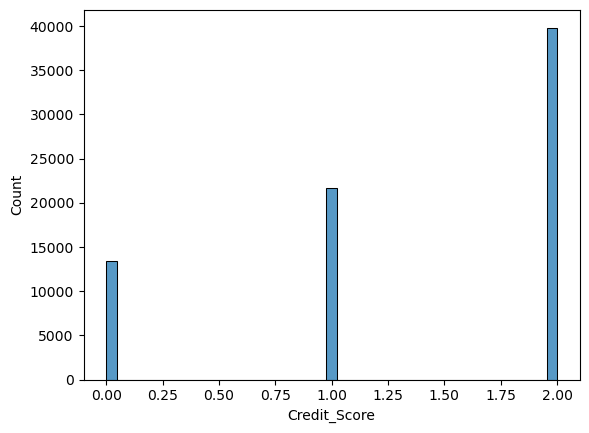

In [87]:
sns.histplot(dataset['Credit_Score'])

<Axes: >

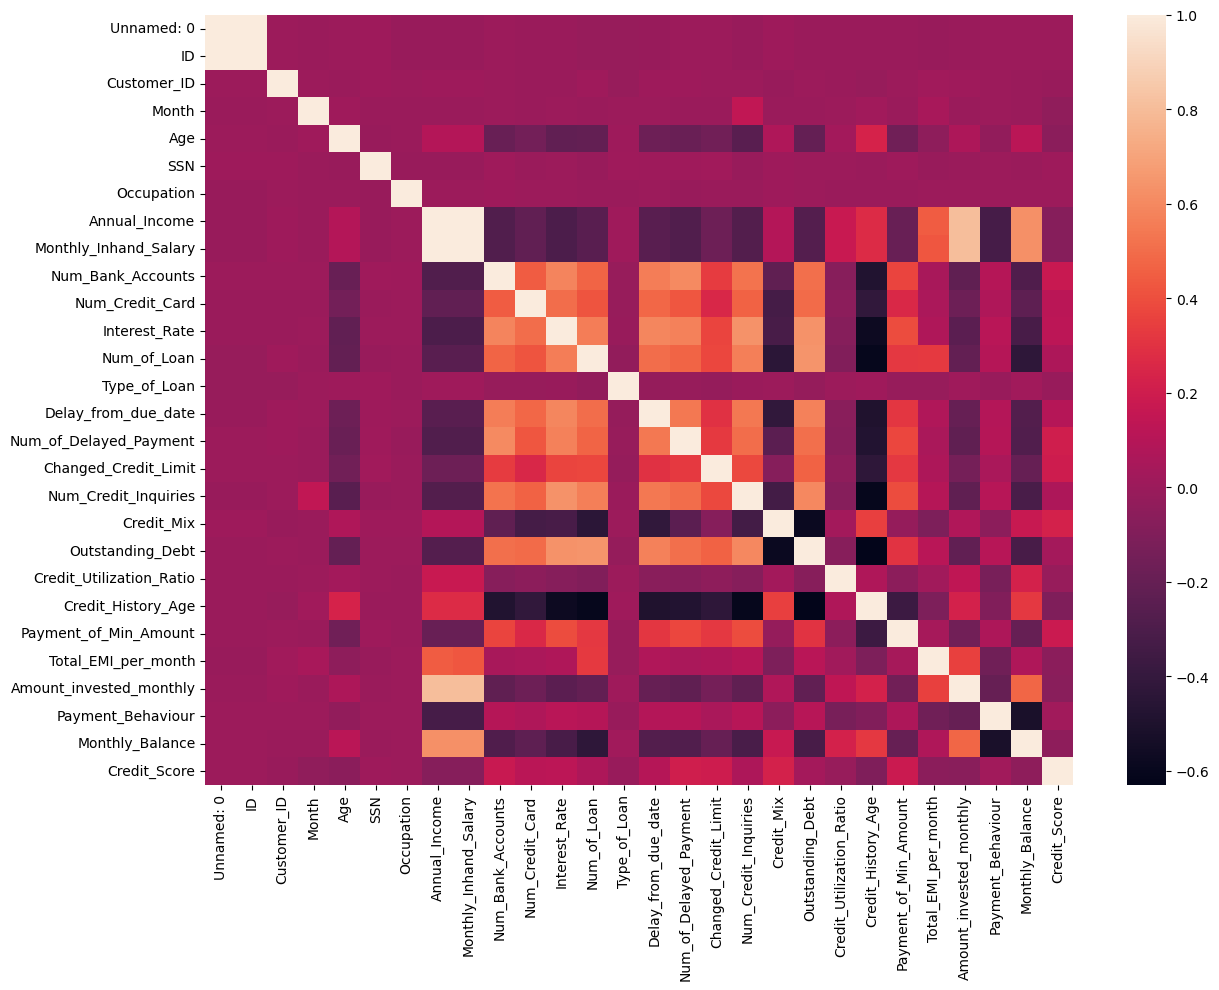

In [88]:
# Let's plot the correlations
from matplotlib import pyplot as plt
plt.figure(figsize = (14,10))
sns.heatmap(dataset.corr())

We see from the correlation plot that, as expected, ID, customer_ID, SSN and are not related to the other variables.
More surprisingly this is also also the case of "occupation". This simply means that the numerical variable resulting from the conversion of occupations to numbers, was not ordered. It would be useless in a linear regression, but we can try a nonlinear one.

A better way to encode the categorical variables would be to create dummy variables for each value.

__Split the train dataset into a `df_train` and a `df_test` dataset.__

In [89]:
import sklearn.model_selection
df_train, df_test = sklearn.model_selection.train_test_split(dataset , test_size= 0.25, random_state=243 )

__Implement a logistic regression.__

In [90]:
df_train.columns

Index(['Unnamed: 0', 'ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [91]:
# we keep only a subset of all variables:
variables = [
    # 'Credit_Score',
    'Changed_Credit_Limit',
    'Payment_of_Min_Amount',
    'Credit_Mix',
    'Delay_from_due_date',
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Age',
    'Monthly_Balance',
    'Num_of_Delayed_Payment',
    'Outstanding_Debt',
    'Payment_Behaviour',
    'Credit_History_Age',
    'Num_Bank_Accounts',
    'Credit_Utilization_Ratio'
]

In [92]:
df_test['Credit_Score']

70144    0
32059    1
25287    2
13496    1
65970    2
        ..
59793    0
33338    2
51142    0
29286    0
58864    2
Name: Credit_Score, Length: 18750, dtype: int64

In [93]:
# we split the set into features and labels:
X = df_train.drop(columns=['Credit_Score'])[variables] # all columns except score
Y = df_train['Credit_Score']

# same for the test set:
X_test = df_test.drop(columns=['Credit_Score'])[variables] # all columns except score
Y_test = df_test['Credit_Score']

We need a logistic classifier, since we are predicting binary variables

In [94]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
regression = model.fit(X,Y)

/home/pablo/.local/opt/micromamba/envs/escp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
lr_score_test=model.score(X , Y)
lr_score_test

0.5916444444444444

__Compute the confusion matrix using the test set. Comment__

This is how our model performs on the test set.

In [132]:
# adjust the following code if needed

In [131]:
actual = Y_test
predicted = model.predict(X_test)

For classification problems a standard way to represent the performance, consists in computing
the "confusion matrix".

In [97]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(actual, predicted)
confusion_matrix

array([[ 862,   39, 2462],
       [ 166, 2299, 3012],
       [ 703, 1259, 7948]])

In [98]:
cm_display_0 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = score_categories)

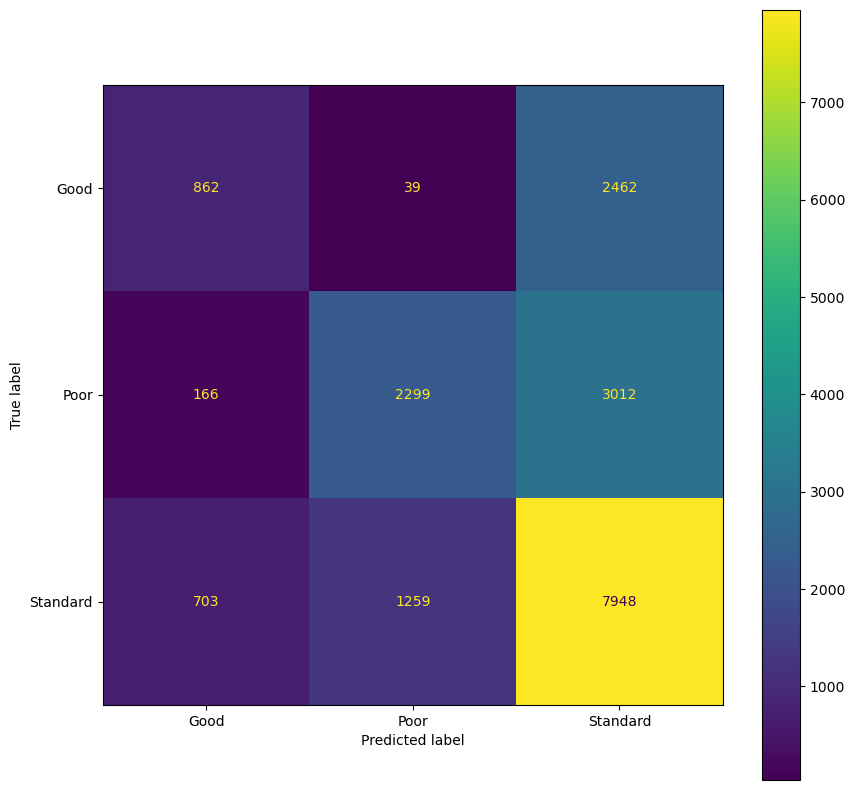

In [99]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
cm_display_0.plot(ax=ax)

We can also normalize by the number of observations for each category (divide each row by the total of this row).

In [100]:
confusion_matrix_percents = confusion_matrix / confusion_matrix.sum(axis=1)[:,None] *100
confusion_matrix_percents # check that each row sums to 1

array([[25.6318763 ,  1.15967886, 73.20844484],
       [ 3.03085631, 41.97553405, 54.99360964],
       [ 7.0938446 , 12.70433905, 80.20181635]])

This tells us that 33% of the `poor` ratings were correctly detected (true positive). Or, equivalently, that 67% of them were not detected (false positive).

In [101]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_percents, display_labels = score_categories)

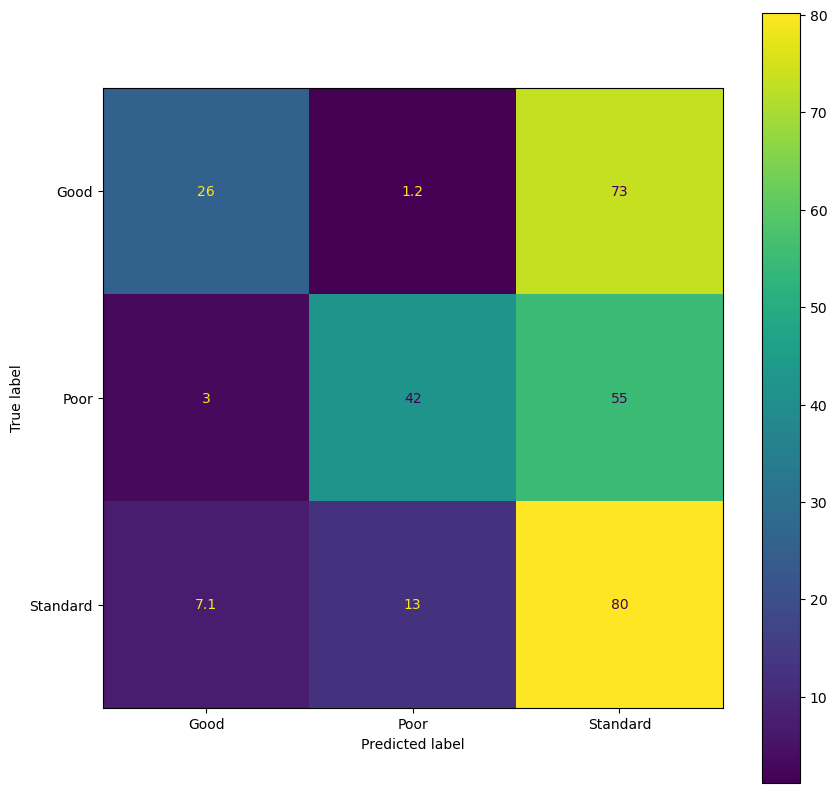

In [102]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
cm_display.plot(ax=ax)

Symmetrically, we can normalize by the number of predicted labels, i.e. the sum of each column.

In [103]:
confusion_matrix_percents = confusion_matrix / confusion_matrix.sum(axis=0)[None,:] *100
confusion_matrix_percents # check that *columns* sum to 1

array([[49.79780474,  1.08423686, 18.34301892],
       [ 9.58983247, 63.91437309, 22.44076889],
       [40.6123628 , 35.00139005, 59.21621219]])

As before we can make a graphical representation:

In [104]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_percents, display_labels = score_categories)

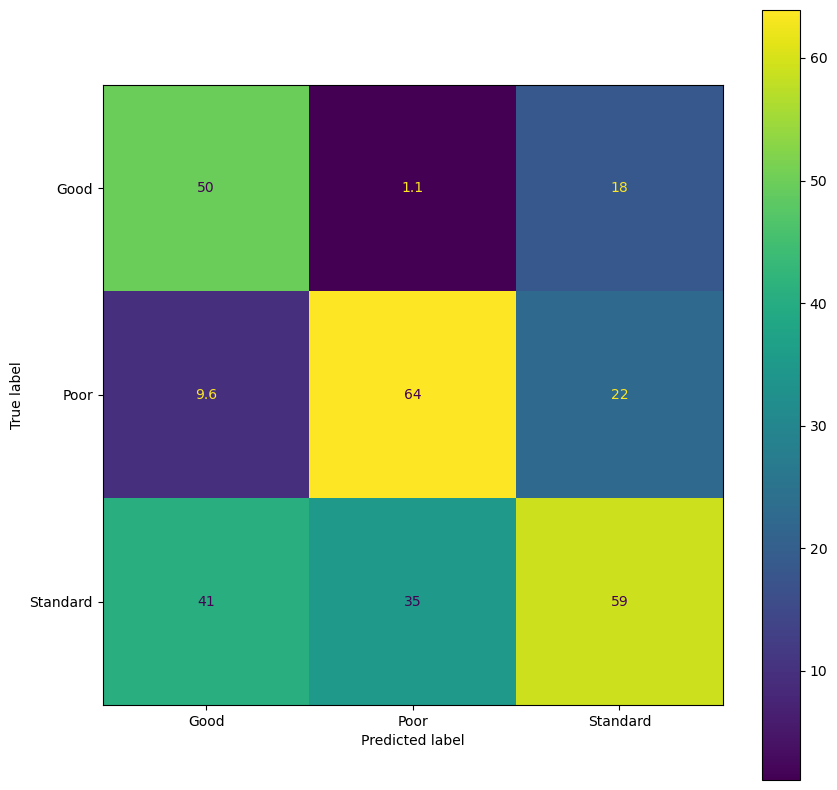

In [105]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
cm_display.plot(ax=ax)

We see now that of all the poor ratings that are detected 54% were actually poor. Hence 46% of them were incorrect.

__Perform the same analysis with other classification methods and compare their performance using the test set.__

In [106]:
# Clearly we need to use some nonlinear model instead

In [107]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
regression = model.fit(X,Y)

In [108]:
actual = Y_test
predicted = model.predict(X_test)

In [109]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(actual, predicted)
confusion_matrix

array([[2022,  113, 1228],
       [ 189, 4152, 1136],
       [1077, 1395, 7438]])

In [110]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = score_categories)

Text(0.5, 1.0, 'KNeighborsClassifier')

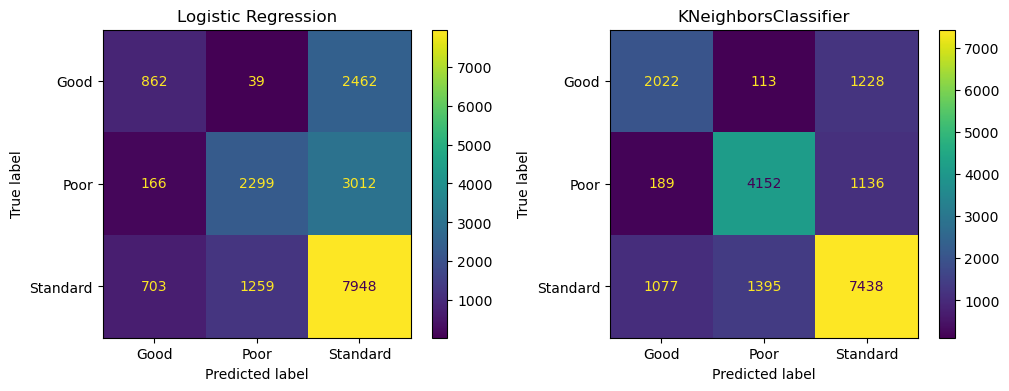

In [111]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax = plt.subplot(1,2,1)
ax.grid(False)
cm_display_0.plot(ax=ax)
plt.title("Logistic Regression")
ax = plt.subplot(1,2,2)
ax.grid(False)
cm_display.plot(ax=ax)
plt.title("KNeighborsClassifier")

We see that the new measure performs much better (all the wrong predictions are less frequent exept for a few more good ratings predicted as poor.

For poor ratings, the number of false negative is now 24% ((189+1136)/ (189+ 4152+ 1136)) and the number of false positive is 27% ((113+1395)/(113+4152+1395)). This is to be compare to the figures from the logistic regressison (67% and 46% respectively).

__Which one would you choose? Test its performance on the validation set__

The KNeighbours classifier clearly performs better on the training set. We still need to check that it generalises properly on the *validation* set.

We need to do the same preprocessing as before. Here we need to pay attention to the fact that the validation set is preprocessed exactly in the same way as the training set.

A quick search ([source](https://stackoverflow.com/questions/38749305/labelencoder-order-of-fit-for-a-pandas-df)) shows that the *LabelEncoder* attributes numbers in sorting orders: we can then do the same steps as before for the same results.

In [112]:
from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
validation['Payment_of_Min_Amount'] = le().fit_transform(validation['Payment_of_Min_Amount'])
validation['Payment_Behaviour'] = le().fit_transform(validation['Payment_Behaviour'])
validation['Occupation'] = le().fit_transform(validation['Occupation'])
validation['Type_of_Loan'] = le().fit_transform(validation['Type_of_Loan'])
validation['Credit_Mix'] = le().fit_transform(validation['Credit_Mix'])
validation['Credit_Score'] = le().fit_transform(validation['Credit_Score'])

In [113]:
X_valid = validation.drop(columns=['Credit_Score'])[variables] # all columns except score
Y_valid = validation['Credit_Score']

In [114]:
actual = Y_valid
predicted = model.predict(X_valid)

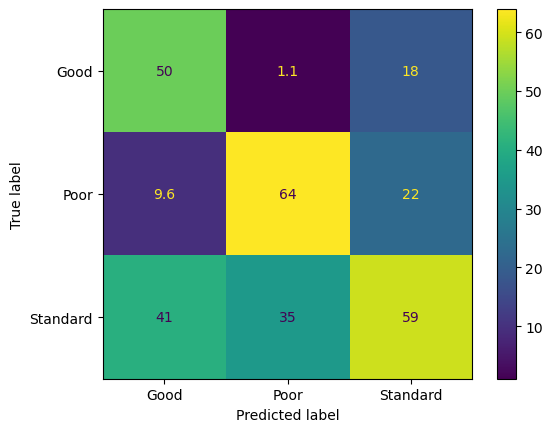

In [115]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_percents, display_labels = score_categories)
cm_display.plot()

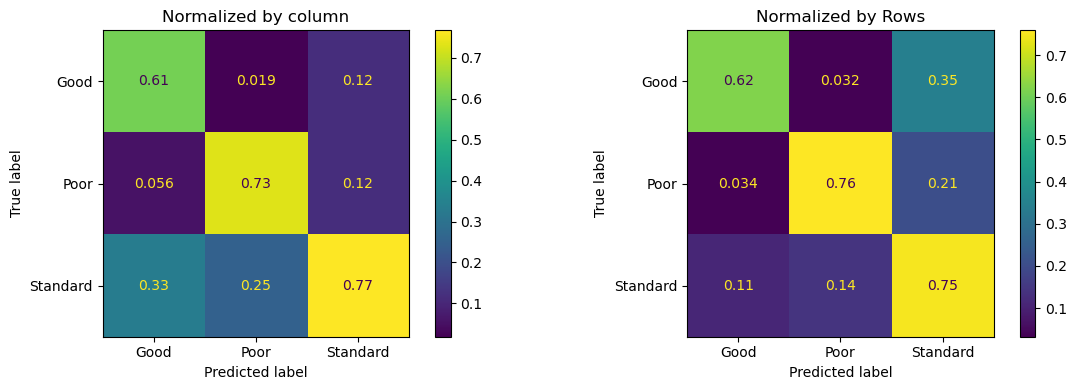

In [40]:
# normalize by the number of predicted labels (sum of columns)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax = plt.subplot(1,2,1)
cm = confusion_matrix/confusion_matrix.sum(axis=0)[None, :]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = score_categories)
cm_display.plot(ax=ax)
plt.title("Normalized by column")
ax = plt.subplot(1,2,2)
cm = confusion_matrix/confusion_matrix.sum(axis=1)[:,None]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = score_categories)
cm_display.plot(ax=ax)
plt.title("Normalized by Rows")
plt.tight_layout()


We see that 27% of the poor grades (1-0.73) are misclassified (false negatives) and 25% of the bad scores are actually good or standard (false positive).
This is close to the statistics on the training set.


__Bonus__: the use of the label encoder is not ideal, because it assumes some hierarchy of the undrelying model or requires the use of a nonlinear-model. The following code performs another encoding with one dummy variable per value.

In [116]:
import pandas
dataset = pandas.read_csv("train.csv")
validation = pandas.read_csv("test.csv")


In [117]:
from sklearn.preprocessing import OneHotEncoder

In [118]:
def create_dummy(category):
    # this create a new pandas dataframe where each columnn contains a dummy variable for category
    ohe = OneHotEncoder(sparse_output=False)
    ft = ohe.fit_transform(dataset[[category]])
    df = pandas.DataFrame(ft, columns= ohe.categories_ )
    return df

In [59]:
# encoder = LabelEncoder()
pma = create_dummy("Payment_of_Min_Amount")
pb = create_dummy('Payment_Behaviour')
occ = create_dummy('Occupation')
tol = create_dummy('Type_of_Loan')
cm = create_dummy('Credit_Mix')

In [60]:
data = pandas.concat([
    dataset.drop(columns=["Payment_of_Min_Amount","Payment_Behaviour", "Occupation", "Type_of_Loan", "Credit_Mix"]),
    pma,
    pb,
    occ,
    tol,
    cm
], axis=1)

In [61]:
# Unfortunately, this crashes the kernel: we are limited by the memory of online instances

## Segmenting the bank clients

__With the same database, without using the credit score, implement a k-means clustering algorithm.__

In [124]:
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=3)
km_model.fit(dataset)

KMeans(n_clusters=3)

In [125]:
# we then attribute each element in the training set to a cluster according to the model
dataset['cluster'] = km_model.predict(dataset)

__Are the clusters related to the credit score?__

Let's compute the proportion of each score in each cluster.

In [126]:
dataset.groupby("cluster")['Credit_Score'].value_counts(normalize =True)

cluster  Credit_Score
0        2               0.520876
         1               0.299119
         0               0.180006
1        2               0.532145
         1               0.285075
         0               0.182780
2        2               0.540301
         1               0.283742
         0               0.175958
Name: proportion, dtype: float64

The proportion of each score does not seem to depend much on the clustering variable.

It  suggests there are indeed similarity clusters that are uncorrelated to the ability to repay